In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras_preprocessing.image import ImageDataGenerator

import os
from keras.callbacks import EarlyStopping


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras_preprocessing.image import img_to_array


Found 1881 images belonging to 6 classes.
Found 415 images belonging to 6 classes.
Found 509 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
(128, 150, 150, 3)
(128, 6)
(128, 150, 150, 3)
(128, 6)
(128, 150, 150, 3)
(128, 6)
(31, 150, 150, 3)
(31, 6)
(128, 150, 150, 3)
(128, 6)
(128, 150, 150, 3)
(128, 6)


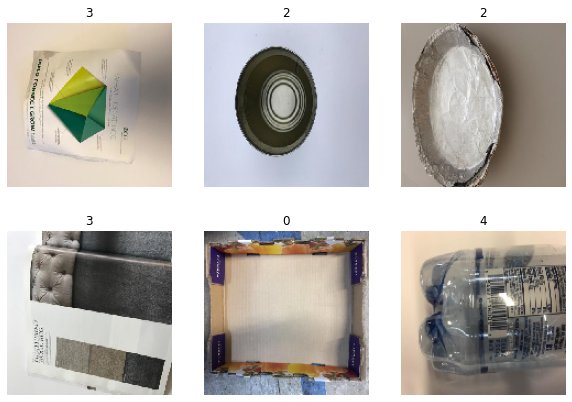

In [4]:

train_path='./drive/MyDrive/odev/train'
test_path='./drive/MyDrive/odev/test'




train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

val_datagen=ImageDataGenerator(rescale=1/255,validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    shuffle=True,
    class_mode="categorical",
    batch_size=128,
    subset="training"
    )


val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(150,150),
    shuffle=True,
    class_mode="categorical",
    batch_size=128,
    subset="validation"
)


test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(150,150),
    class_mode="categorical",
    batch_size=1,
    
)


# class indisleri
print (val_generator.class_indices)

plt.figure(figsize=(10,7))
for i in range(6):
  img,y=val_generator.next()
  print(img.shape)
  print(y.shape)
  plt.subplot(2,3,i+1)
  plt.title(list(y[:6][0]).index(1))
  plt.axis('off')
  plt.imshow(img[0])



In [5]:
model=Sequential()
model.add(Flatten(input_shape=(150,150,3)))

model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(6,activation='softmax'))


model.compile(loss="categorical_crossentropy",optimizer='Adam',metrics=["accuracy"])

model.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 67500)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               34560512  
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               3

In [6]:
history=model.fit(
    
    train_generator,
    steps_per_epoch=train_generator.samples//128,
    epochs=100,
    validation_data=val_generator,
    validation_steps=val_generator.samples//128
)


Epoch 1/100
14/14 [==============================] - 238s 17s/step - loss: 9.6531 - accuracy: 0.1658 - val_loss: 8.7637 - val_accuracy: 0.1745


Exception ignored in: <function IteratorResourceDeleter.__del__ at 0x7fb9b6375cb0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/iterator_ops.py", line 535, in __del__
    handle=self._handle, deleter=self._deleter)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/ops/gen_dataset_ops.py", line 1264, in delete_iterator
    _ctx, "DeleteIterator", name, handle, deleter)
KeyboardInterrupt: 


Epoch 2/100
14/14 [==============================] - 15s 1s/step - loss: 4.3807 - accuracy: 0.1875 - val_loss: 1.8171 - val_accuracy: 0.1589
Epoch 3/100
14/14 [==============================] - 15s 1s/step - loss: 1.8626 - accuracy: 0.2077 - val_loss: 1.8948 - val_accuracy: 0.1797
Epoch 4/100
14/14 [==============================] - 15s 1s/step - loss: 1.8627 - accuracy: 0.2110 - val_loss: 1.8652 - val_accuracy: 0.1615
Epoch 5/100
14/14 [==============================] - 15s 1s/step - loss: 1.8485 - accuracy: 0.1901 - val_loss: 1.7847 - val_accuracy: 0.2109
Epoch 6/100
14/14 [==============================] - 15s 1s/step - loss: 1.7665 - accuracy: 0.2216 - val_loss: 1.7641 - val_accuracy: 0.1875
Epoch 7/100
14/14 [==============================] - 15s 1s/step - loss: 1.7213 - accuracy: 0.2322 - val_loss: 1.7435 - val_accuracy: 0.2214
Epoch 8/100
14/14 [==============================] - 15s 1s/step - loss: 1.6953 - accuracy: 0.2668 - val_loss: 1.7110 - val_accuracy: 0.2786
Epoch 9/100
1

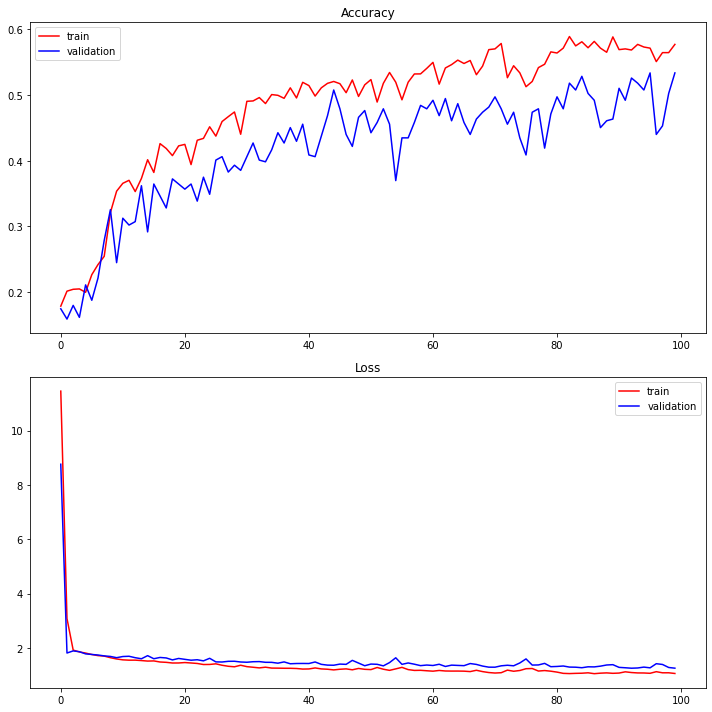

In [7]:
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.title("Accuracy")
plt.plot(history.history["accuracy"], color='r',label='train')
plt.plot(history.history["val_accuracy"], color='b',label='validation')
plt.legend(loc='best')


plt.subplot(212)
plt.title("Loss")
plt.plot(history.history["loss"], color='r',label='train')
plt.plot(history.history["val_loss"], color='b',label='validation')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [8]:
score=model.evaluate(test_generator)
print("Test Loss: ",score[0])
print("Test Accuracy: ",score[1]*100)

509/509 [==============================] - 80s 158ms/step - loss: 1.2341 - accuracy: 0.5521
Test Loss:  1.2340857982635498
Test Accuracy:  55.206286907196045


In [9]:
y_pred=np.argmax(model.predict(test_generator), axis=1)

from sklearn.metrics import classification_report, confusion_matrix

print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))



Confusion Matrix
[[13 18 12 18 14  6]
 [14 16 23 25 18  5]
 [18 16 12 26  5  5]
 [18 15 21 36 16 13]
 [13 16 19 28 16  6]
 [ 7  4  4  5  5  3]]


In [10]:
print('Classification Report')

target_names=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   cardboard       0.16      0.16      0.16        81
       glass       0.19      0.16      0.17       101
       metal       0.13      0.15      0.14        82
       paper       0.26      0.30      0.28       119
     plastic       0.22      0.16      0.19        98
       trash       0.08      0.11      0.09        28

    accuracy                           0.19       509
   macro avg       0.17      0.17      0.17       509
weighted avg       0.19      0.19      0.19       509

